# Part I - Ford GoBike System Data Exploration
## by Caio Priszculnik

## Introduction

The dataset explored in this analysis is from the Ford GoBike System. It includes data about individual rides in a bike sharing system from the greater San Francisco Bay area in California, USA. The data is in a csv flatfile.

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
# Read the file into a dataframe
bike_df = pd.read_csv('201902-fordgobike-tripdata.csv')
bike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
# Explore the structure of the dataset
bike_df.shape

(183412, 16)

In [4]:
# Check columns data types and info
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

A few of the columns are not the of the expected data type:
* start_time and end_time should be datatime type
* start_station_id, end_station_id and bike_id should be strings
* member_birth_year should be int and drop null values from this column

In [5]:
# Convert start_time and end_time to datetime
datetime_col = ['start_time', 'end_time']

for col in datetime_col:
    bike_df[col] = pd.to_datetime(bike_df[col])

In [6]:
# Convert id columns to string
id_col = ['start_station_id', 'end_station_id', 'bike_id']

for col in id_col:
    bike_df[col] = bike_df[col].astype(str)

In [7]:
# Drop cases when the member_birth_year is null
bike_df = bike_df.dropna(subset=['member_birth_year'])

In [8]:
# Convert member_birth_year to int
bike_df['member_birth_year'] = bike_df['member_birth_year'].astype(int)

In [9]:
# Check if columns are of the expected data type
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175147 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             175147 non-null  int64         
 1   start_time               175147 non-null  datetime64[ns]
 2   end_time                 175147 non-null  datetime64[ns]
 3   start_station_id         175147 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   175147 non-null  float64       
 6   start_station_longitude  175147 non-null  float64       
 7   end_station_id           175147 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     175147 non-null  float64       
 10  end_station_longitude    175147 non-null  float64       
 11  bike_id                  175147 non-null  object        
 12  user_type       

In [10]:
bike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No


In [11]:
# Check null values
bike_df.isnull().sum()

duration_sec                 0
start_time                   0
end_time                     0
start_station_id             0
start_station_name         195
start_station_latitude       0
start_station_longitude      0
end_station_id               0
end_station_name           195
end_station_latitude         0
end_station_longitude        0
bike_id                      0
user_type                    0
member_birth_year            0
member_gender                0
bike_share_for_all_trip      0
dtype: int64

In [12]:
bike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No


In [13]:
# Check duplicated values
sum(bike_df.duplicated())

0

In [14]:
# Check descriptive statistics for numeric values
bike_df[['duration_sec', 'member_birth_year']].describe()

,duration_sec,member_birth_year
count,175147.000000,175147.000000
mean,704.211845,1984.806437
std,1641.608363,10.116689
min,61.000000,1878.000000
25%,323.000000,1980.000000
50%,510.000000,1987.000000
75%,789.000000,1992.000000
max,84548.000000,2001.000000


In [15]:
# Explore the range of dates in the dataset
print(bike_df.start_time.min(), bike_df.start_time.max())

2019-02-01 00:00:20.636000 2019-02-28 23:59:18.548000


### What is the structure of your dataset?

There are 183,412 rides in the dataset with 16 features(duration in seconds, start time, end time, start station id, start station name, start station latitude, start station longitude, end station id, end station name, end station latitude, end station longitude, bike id, user type, member birth year, member gender and bike share for all trip).
After removing rows where the member's birth year and member's gender were Null, there are 175,147 trips in the dataset.
All rides were recorded between the month of February in 2019.

### What is/are the main feature(s) of interest in your dataset?

The main features of interest in the dataset are the duration of the trips, if regular customers or subscriber customer have a higher number of rides, if there is a specific time of the day or day of the week associated with more trips, if a specific station has a higher number of trips.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The start time will help me explore if a particular day of the week or time of the day is associated with more or longer rides. The user type will be used to explore if subscribers ride more than regular customers. 

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

### Distribution of the duration of the trip

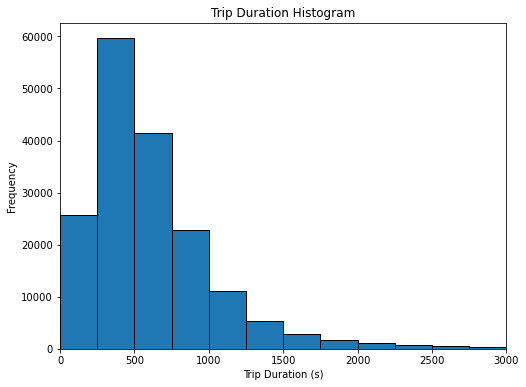

In [16]:
# Plot the histogram for duration_sec
# Define bin size and edges
plt.figure(figsize=[8, 6])
bin_edges = np.arange(0, bike_df.duration_sec.max() + 250, 250)
plt.hist(data=bike_df, x='duration_sec', bins=bin_edges, edgecolor='black')
plt.xlim((0, 3000)) # Zoom only on trips that are up to 3,000 seconds long
plt.title('Trip Duration Histogram') # Add title
plt.xlabel('Trip Duration (s)') # Add label to x-axis
plt.ylabel('Frequency');

Looking at the histogram for trip duration we can see that most of the trips have a duration of up to 1,000 seconds and the interval with most trips is the one between 250 and 500 seconds. There is a very small number of trips with duration superior to 2,000 seconds.
The distribution of the trip duration is right-skewed.

### At which hours of the day are there more trips?

In [17]:
# Create start hour column
bike_df['start_hour'] = bike_df.start_time.dt.hour

In [18]:
# Define color pallete for seaborn
base_color = sns.color_palette()[0]

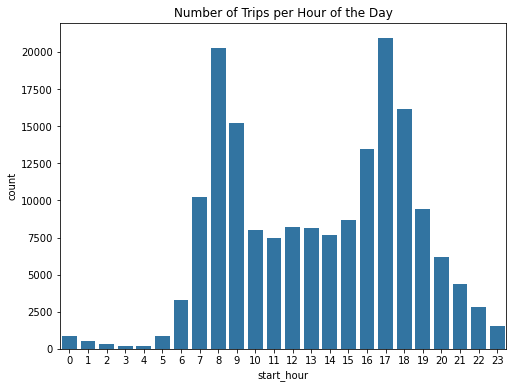

In [19]:
# Plot the distribution of trips per hour of the day
plt.figure(figsize=[8, 6])
sns.countplot(data=bike_df, x='start_hour', color=base_color)
plt.title('Number of Trips per Hour of the Day');

We can see that this distribution is bimodal, with two peaks around the morning (8-10) and afternoon (16-18) rush hours. One hypothesis for this behavior is that these trips are probably from commutes to and back from work. Furthermore, we can also see that there is a very small number of trips during dawn (0-5).

### Which days of the week have more trips?

In [20]:
# Create day of week column
bike_df['start_day_of_week'] = bike_df.start_time.dt.day_name()

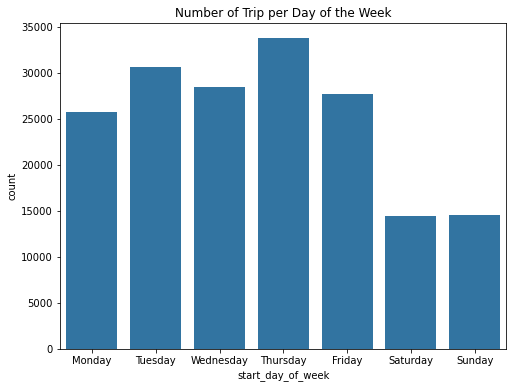

In [21]:
# Plot the distribution of trips per day of the week
plt.figure(figsize=[8, 6])
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'] # Define the day of week order
sns.countplot(data = bike_df, x='start_day_of_week', color=base_color, order=day_order)
plt.title('Number of Trip per Day of the Week');

We can see that Thursday is the day of the week with the highest number of trips. Furthermore, there are usually more trips during weekdays than on weekends.

### Are there more trips from subscribers or regular customers in the dataset?

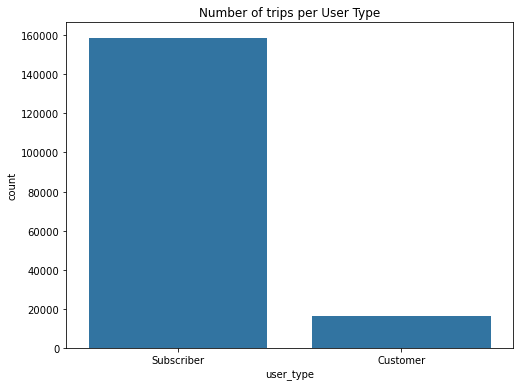

In [22]:
# Plot the distribution of user_type
plt.figure(figsize=[8, 6])
# Sort the data on number of user per user type
user_order = bike_df.user_type.value_counts().index
sns.countplot(data=bike_df, x='user_type', color=base_color, order=user_order)
plt.title('Number of trips per User Type');

There are more trips by subscribers in the dataset.

### Which station has the highest number of trips?

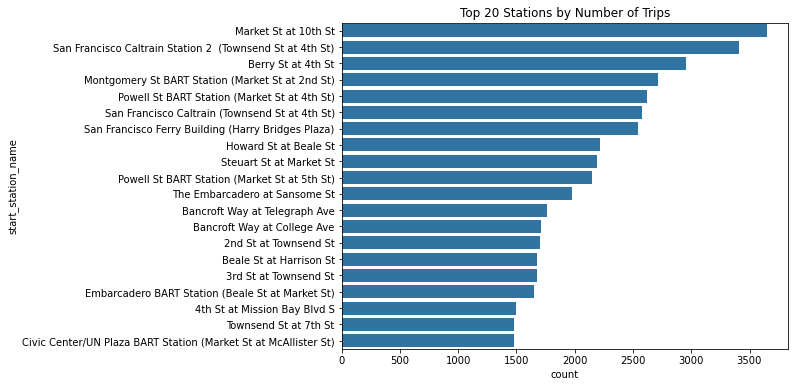

In [23]:
# Plot the distribution of the top 20 start station name on the number of trips
plt.figure(figsize=[8, 6])
station_order = bike_df.start_station_name.value_counts()[:20].index # Order and select only top 20 stations
sns.countplot(data=bike_df, y='start_station_name', color=base_color, order=station_order)
plt.title('Top 20 Stations by Number of Trips');

Looking at this visualization we can see that there are only 7 different stations that have more than 2,500 trips in the dataset.

### What is the distribution of age in the number of trips?

In [24]:
# Create age column
bike_df['member_age'] = 2019 - bike_df.member_birth_year

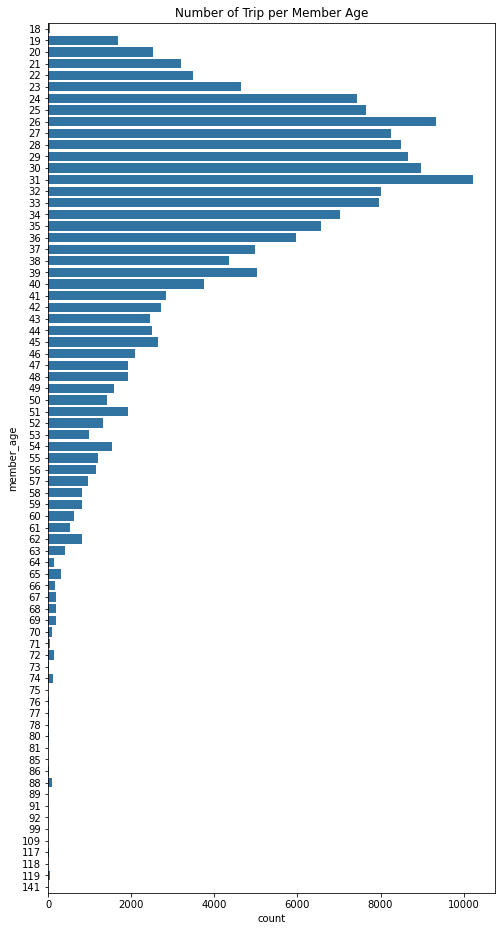

In [25]:
# Plot the distribution of trips per member's age
plt.figure(figsize=[8, 16])
sns.countplot(data = bike_df, y='member_age', color=base_color)
plt.title('Number of Trip per Member Age');

Most of the trips were by members who are young adults (24-35 years old).There is a very limited number of trips from members who are 60 years old or older. There are a few odd trips by members that are older than 109 years old.

### Are there more trips from men or from women?

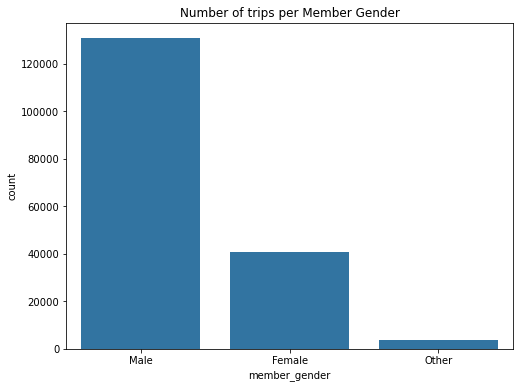

In [26]:
# Plot the distribution of gender
plt.figure(figsize=[8, 6])
# Sort the data on number of trips per gender
gender_order = bike_df.member_gender.value_counts().index
sns.countplot(data=bike_df, x='member_gender', color=base_color, order=gender_order)
plt.title('Number of trips per Member Gender');

There are 3x more trips by males than females.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The duration variable has a long range of values, with trips ranging between 61 seconds and 85,444 seconds. In order to be better able to see this distribution I zoomed in trips that were up to 3,000 seconds long.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I created new columns in the dataset for the start hour of the ride and the day of the week of the ride. I created these new features to explore what is the distribution of trips in the different days of the week and different periods of the day. I also created a new column with the member's age, this is a more straightforward information than the member's birth year to explore the age distribution of users of the bike sharing program.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### What is the distribution of trip duration by age?

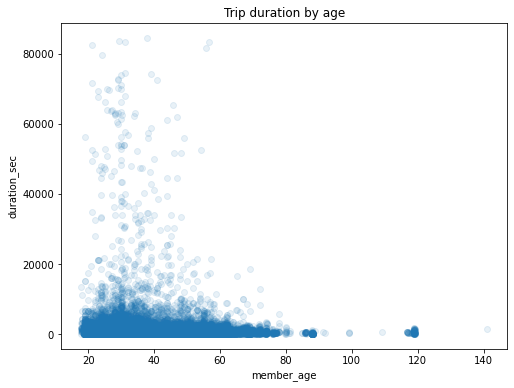

In [27]:
# Plot a scatter plot of trip duration and member's age
plt.figure(figsize=[8, 6])
sns.regplot(data=bike_df, x='member_age', y='duration_sec', fit_reg=False, scatter_kws={'alpha':0.1}, x_jitter=0.2)
plt.title('Trip duration by age');

Most of the longer trips (more than 20,000 seconds long) were by members who are younge than 60 years old.

### Do men or women have longer trips?

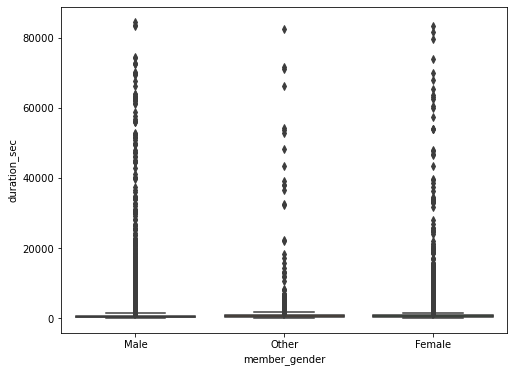

In [28]:
# Plot boxplot for trip duration and gender
plt.figure(figsize=[8, 6])
sns.boxplot(data=bike_df, x='member_gender', y='duration_sec');

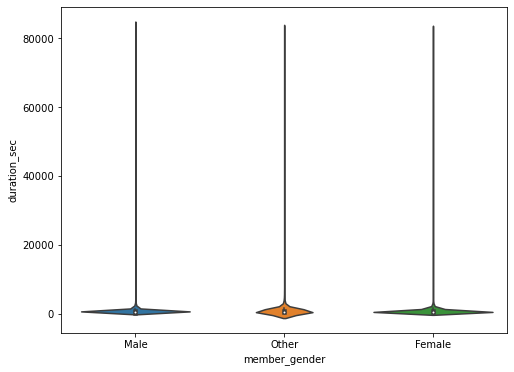

In [29]:
# Plot violinplot for trip duration and gender
plt.figure(figsize=[8, 6])
sns.violinplot(data=bike_df, x='member_gender', y='duration_sec');

As there are a lot of outliers in the trip duration, the boxplot and violinplot are not very conclusive. It will be more interesting to compare the average duration of trips by gender using a barchart.

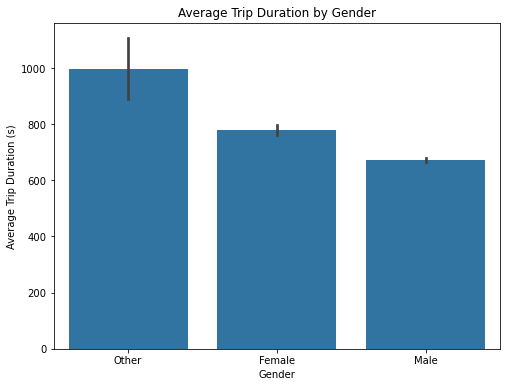

In [30]:
# Plot average duration by gender
plt.figure(figsize=[8, 6])
gender_order = ['Other', 'Female', 'Male']
sns.barplot(data=bike_df, x='member_gender', y='duration_sec', color=base_color, order=gender_order)
plt.xlabel('Gender')
plt.ylabel('Average Trip Duration (s)')
plt.title('Average Trip Duration by Gender');

On average the trips by female are longer than the trips by males.

### Which day of the week has the longest trips?

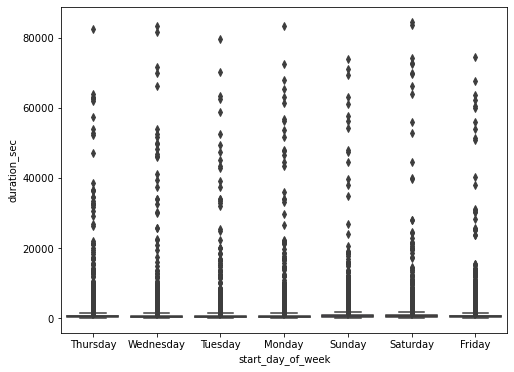

In [31]:
# Plot boxplot for trip duration and day of week
plt.figure(figsize=[8, 6])
sns.boxplot(data=bike_df, x='start_day_of_week', y='duration_sec');

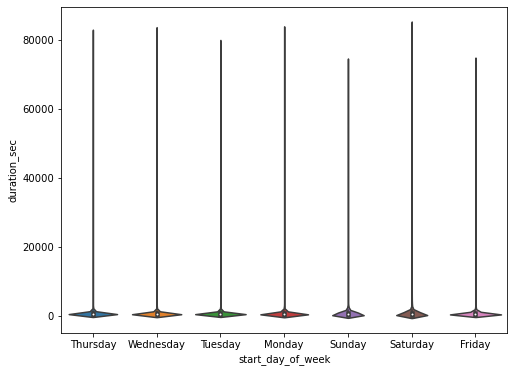

In [32]:
# Plot violinplot for trip duration and day of week
plt.figure(figsize=[8, 6])
sns.violinplot(data=bike_df, x='start_day_of_week', y='duration_sec');

As there are a lot of outliers in the trip duration, the boxplot and violinplot are not very conclusive. It will be more interesting to compare the average duration of trips by day of the week using a barchart.

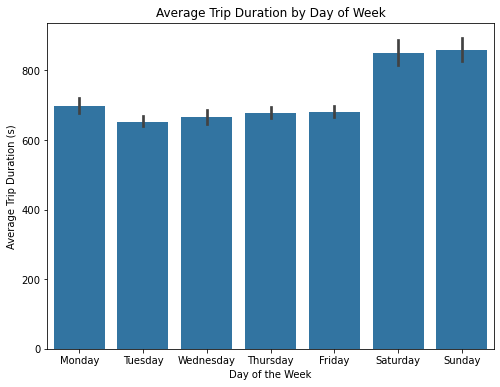

In [33]:
# Plot average duration by day of week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'] # Define the day of week order
plt.figure(figsize=[8, 6])
sns.barplot(data=bike_df, x='start_day_of_week', y='duration_sec', color=base_color, order=day_order)
plt.ylabel('Average Trip Duration (s)')
plt.xlabel('Day of the Week')
plt.title('Average Trip Duration by Day of Week');

Trips during the weekend have a higher average duration than trips during the week.

### What time of the day has the longest trips?

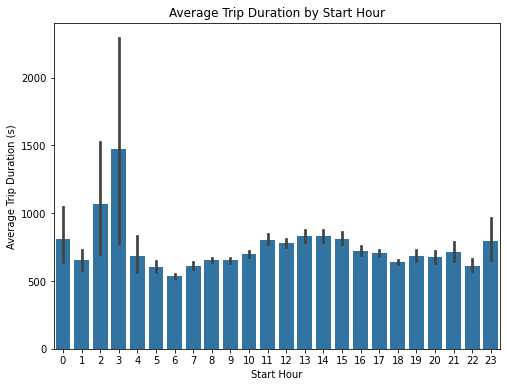

In [34]:
# Plot average duration by hour
plt.figure(figsize=[8, 6])
sns.barplot(data=bike_df, x='start_hour', y='duration_sec', color=base_color)
plt.ylabel('Average Trip Duration (s)')
plt.xlabel('Start Hour')
plt.title('Average Trip Duration by Start Hour');

The trips that started between 2 and 3 are the ones with the longest average duration. This wasn't the expected result, I would expect that trips during dawn would be the shortest.

### Do subscribers or regular members ride more on each day of the week?

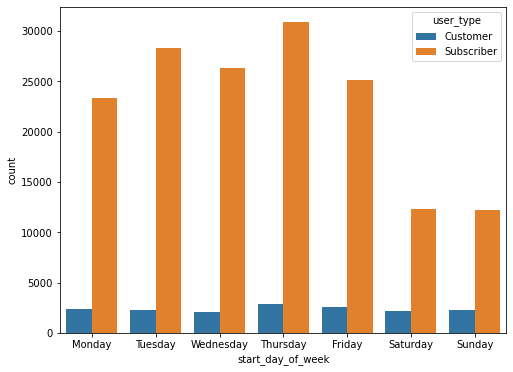

In [35]:
# Plot the number of trips per day of the week for each user type
plt.figure(figsize=[8,6])
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'] # Define the day of week order
sns.countplot(data=bike_df, x='start_day_of_week', hue='user_type', order=day_order);

In [36]:
percentage_trips = bike_df.count()

Subscribers have more trips during weekdays than on weekends. The number of trips by suscribers is specially high on Thursdays. Customers also have more trips on Thursdays, but the number of trips by customers on weekends doesn't seem to be so low compared to the number of trips during weekdays.

### Which day of the month has the longest average trip duration?

In [37]:
# Create start_day column
bike_df['start_day'] = bike_df['start_time'].dt.day

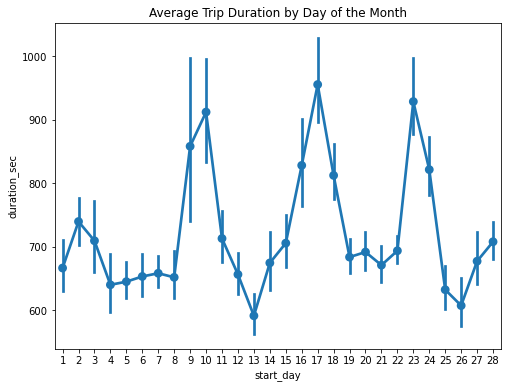

In [38]:
# Plot a line chart of day and average duration in seconds
plt.figure(figsize=[8,6])
sns.pointplot(data=bike_df, x='start_day', y='duration_sec')
plt.title('Average Trip Duration by Day of the Month');

Looking at the average trip per day of the month we can see a seasonality associated with longer average trips on weekends.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

There is a weak negative correlation between the average trip duration and the member's age. Most of the longer trips were by younger members. Trips are usually longer during the weekend than on weekdays, this might happen because on weekends the bikes are used for leisure, while during weekdays they are used for commuting. The number of trips by subscribers had a big decrease during weekends when compared to weekdays.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The trips with the longest average duration were the ones that happened between the hours 2 and 3.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### What is the relationship between age, average duration of trip and subscriber type?

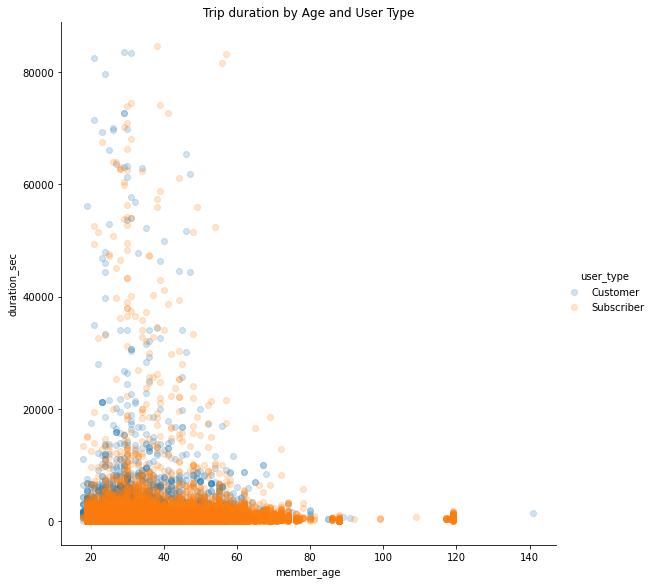

In [39]:
# Scatter plot for age, trip duration and user type
g = sns.FacetGrid(data = bike_df, hue='user_type', height=8)
g.map(plt.scatter, 'member_age', 'duration_sec', alpha=0.2)
plt.title('Trip duration by Age and User Type')
g.add_legend();

Looking at this visualization we can see that most of the shortest trips were taken by subscribers between the ages of 20 and 40.

### What is the relationship between number of trips, start hour and day of the week?

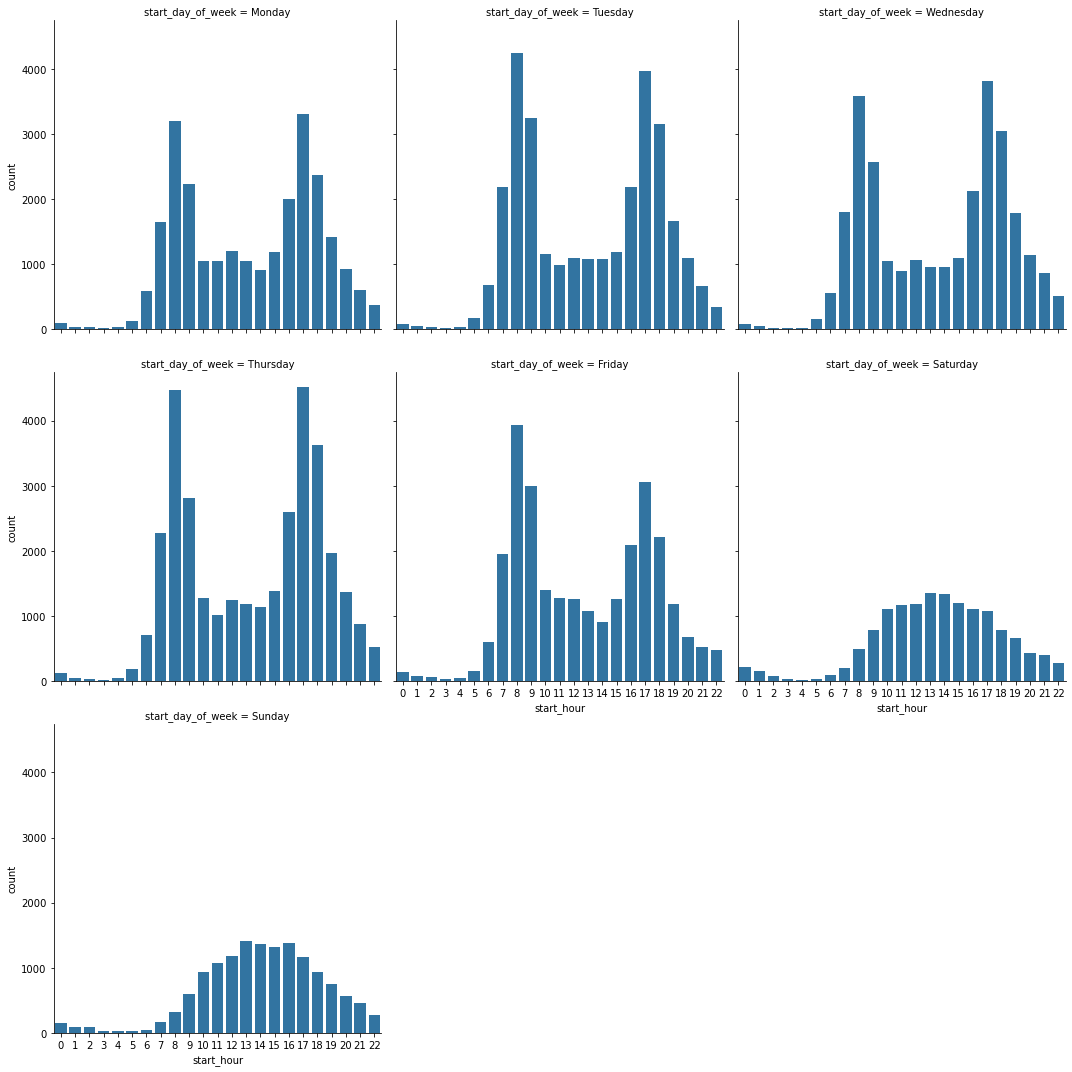

In [40]:
# Plot the number of trips for each day of the week and start hour
g = sns.FacetGrid(data=bike_df, col='start_day_of_week', height=5, col_wrap=3, col_order=day_order)
g.map(sns.countplot, 'start_hour', order=np.arange(0, 23, 1));

Looking at the visualizations above we can see that the bimodal distribution of trips during the rush hour happens only during weekdays. During weekends, most trips happen during the afternoon (13h-17h).

### What is the relationship between average duration of trip, start hour and day of the week?

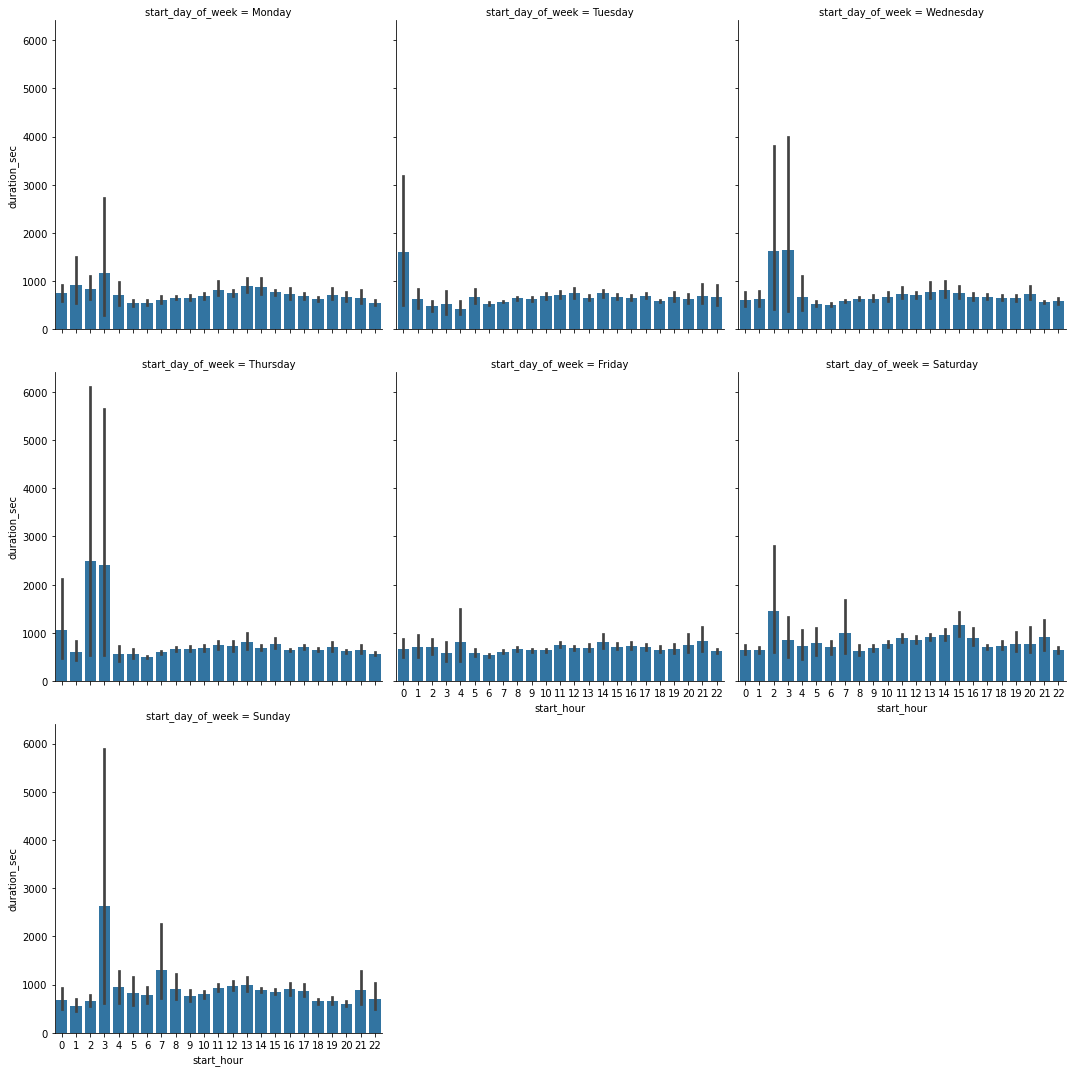

In [41]:
# Plot the hourly average trip duration for each day of the week
g = sns.FacetGrid(data=bike_df, col='start_day_of_week', height=5, col_wrap=3, col_order=day_order)
g.map(sns.barplot, 'start_hour', 'duration_sec', order=np.arange(0, 23, 1));

Looking at this visualization we can see that the longer trips between 2 and 3 happened on Wednesday, Thursday and Sunday. On Saturday, trips around 15h have a longer average duration than on other days of the week.

### What is the average trip duration by day of week and user type?

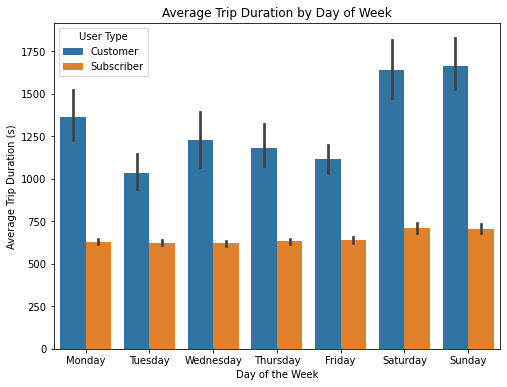

In [42]:
# Plot the average trip duration by day of week and user type
plt.figure(figsize=[8, 6])
sns.barplot(data=bike_df, x='start_day_of_week', y='duration_sec', order=day_order, hue='user_type')
plt.ylabel('Average Trip Duration (s)')
plt.xlabel('Day of the Week')
plt.title('Average Trip Duration by Day of Week')
plt.legend(title='User Type');

Looking at this visualization, we can see that Customers have a much higher average duration of trips than Subscribers. Furthermore, we can see the the difference between the average trip duration for Customers on weekends versus weekdays is greater than this same difference for subscribers. One hypothesis for this behavior is that Customers are sporadic users of the bike sharing program and use it during the weekends for leisure trips and these trips last longer.

### What is the average trip duration by day of week and gender?

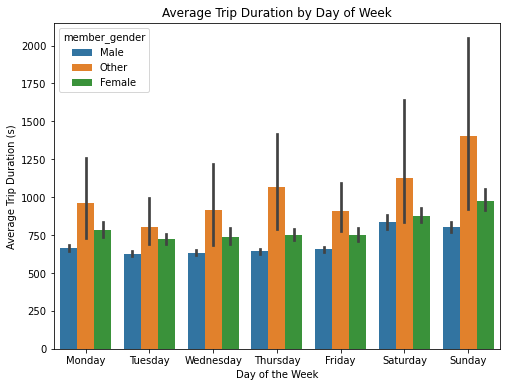

In [43]:
# Plot the average trip duration by day of week and member's gender
plt.figure(figsize=[8, 6])
sns.barplot(data=bike_df, x='start_day_of_week', y='duration_sec', order=day_order, hue='member_gender')
plt.ylabel('Average Trip Duration (s)')
plt.xlabel('Day of the Week')
plt.title('Average Trip Duration by Day of Week');

In all days of the week Other has the longest average trip duration, followed by Females and Males have the shortest average trip duration.

### What is the average trip duration by user type and gender?

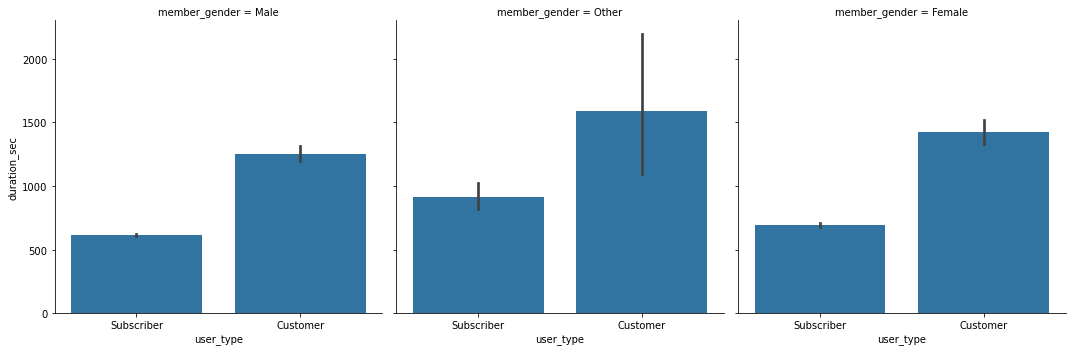

In [44]:
# Plot the average duration of trips by user_type and gender
g = sns.FacetGrid(data=bike_df, col='member_gender', height=5)
g.map(sns.barplot, 'user_type', 'duration_sec', order=['Subscriber', 'Customer']);

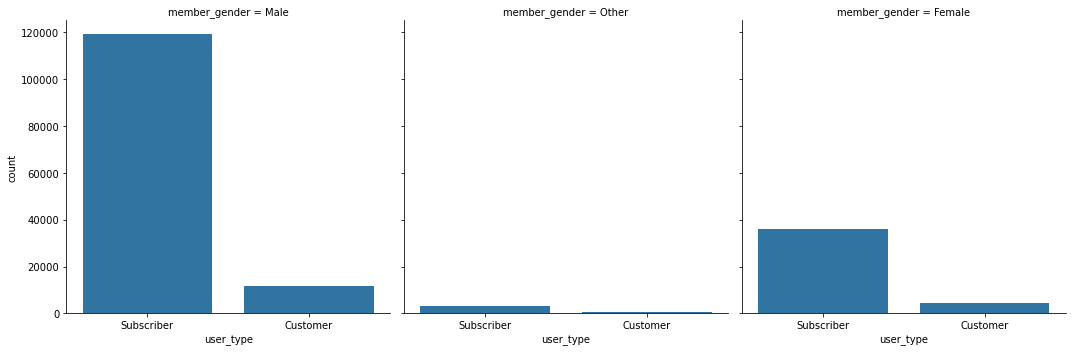

In [45]:
# Plot the number of trips by user_type and gender
g = sns.FacetGrid(data=bike_df, col='member_gender', height=5)
g.map(sns.countplot, 'user_type', order=['Subscriber', 'Customer']);

Independent of gender, customers have a longer average trip duration than subscribers. The ratio of subscribers/customers is much higher for males than for Other or females, this can help explain why males have the lowest average trip duration.

### What is the relationship between day of the month, average trip duration and user type?

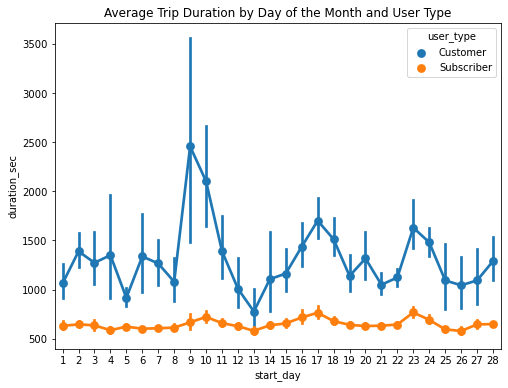

In [46]:
# Plot a line chart of day, average duration in seconds and user type
plt.figure(figsize=[8,6])
sns.pointplot(data=bike_df, x='start_day', y='duration_sec', hue='user_type')
plt.title('Average Trip Duration by Day of the Month and User Type');

We can see that the range of trip duration for customers is much higher than the one for subscribers. One hypothesis for this behavior is that subscribers usually take the same bike trips and therefore have a similar average duration. Customers, on the other hand, take very different kinds of trips.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

In all visualizations with average trip duration we can see that customers have longer average trips than subscribers and this behavior happens for all different genders and days of the week. Therefore, it seems that the relationship between user type and average trip duration is very strong.

### Were there any interesting or surprising interactions between features?

One surprising interaction between the features was that on Wednesday, Thursday and Sunday there are longer average duration trips between 2 and 3, I would expect to see this behavior during the weekend nights (Friday and Saturday), as people could use the bikes to return home after a night out. I wasn't expecting this behavior on weekdays, such as Wednesday or Thursday.

## Conclusions

In this notebook I analyzed data from a bike sharing program in San Francisco. After doing some data wrangling I created a few visualizations to explore the data.
A few interesting conclusions from the visualizations are:
* Most of the trips are up to 1,000 seconds (~16 minutes) long.
* The distribution of trips by hour of the day is bimodal with two peaks at the morning and evening rush hours.
* This bimodal distribution of trips happens only during the weekdays.
* Usually, there are more trips during weekdays than weekends.
* Most of the trips were by Subscribers and Males.
* Most of the trips were by members who are young adults (24-35 years old).
* On average the trips by female are longer than the trips by males.
* On average the trips by customers are longer than the trips by subscribers.
* The average trip duration is longer on weekends than on weekdays.

In [47]:
# Save the updated dataframe to a csv to use in the part II of the project
bike_df.to_csv('bike_df_final.csv')